In [13]:
import json
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import re

c:\Users\Rithuraj pokala\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rithuraj pokala\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rithuraj pokala\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rithuraj pokala\AppData\Local\Programs\Python\

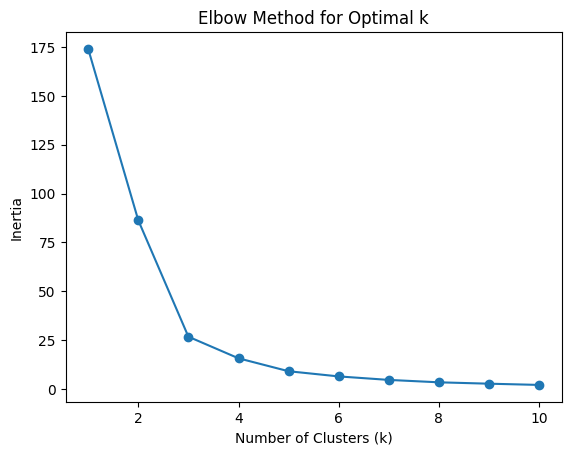

In [43]:
# Function to convert DMS to decimal degrees
def dms_to_dd(dms):
    try:
        degrees, minutes, seconds, direction = map(str.strip, re.split('[°′″]', dms))
        degrees, minutes, seconds = float(degrees), float(minutes), float(seconds)
        decimal_degrees = degrees + minutes/60 + seconds/3600
        return decimal_degrees if direction in ['N', 'E'] else -decimal_degrees
    except Exception as e:
        print(f"Error converting {dms} to decimal degrees: {e}")
        return np.nan  # or any other placeholder value for the problematic cases


# Load your JSON data
with open('location_output.json', 'r') as file:
    data = json.load(file)

# Create a DataFrame from the JSON data
df = pd.DataFrame(data)

# Convert latitude and longitude to numeric values
df['latitude'] = df['latitude'].apply(dms_to_dd)
df['longitude'] = df['longitude'].apply(dms_to_dd)

# Extract features from the DataFrame
features = df[['latitude', 'longitude']].values

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Run KMeans for a range of k values
inertia_values = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia_values.append(kmeans.inertia_)

# Visualize the Elbow Method to determine the optimal number of clusters (k)
import matplotlib.pyplot as plt

plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [30]:
# Load the data from the JSON file
data = pd.read_json('location_output.json')

# Function to convert degrees, minutes, seconds format to decimal degrees
def dms_to_dd(dms):
    parts = dms.replace('\u00b0', '').replace('\u2032', '').replace('\u2033', '').split()
    direction = parts[-1]
    degrees, minutes, seconds = map(float, parts[:-1])
    if direction in ['S', 'W']:
        degrees = -degrees
    return degrees + minutes/60 + seconds/3600

# Convert latitude and longitude to numeric values
data['latitude_numeric'] = data['latitude'].apply(dms_to_dd)
data['longitude_numeric'] = data['longitude'].apply(dms_to_dd)

# Specify the number of clusters (you need to choose this based on your data)
num_clusters = 6  # You can adjust this number

# Select only the relevant columns for clustering
coordinates = data[['latitude_numeric', 'longitude_numeric']]

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(coordinates)

# Save the clustered data with the original latitude and longitude format to a new JSON file
data[['name', 'popularity', 'longitude', 'latitude', 'location', 'instance', 'cluster']].to_json('clustered_data.json', orient='records')


c:\Users\Rithuraj pokala\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [31]:
# Load the clustered data from the JSON file
clustered_data = pd.read_json('clustered_data.json')

# Save the clustered data to a CSV file
clustered_data.to_csv('clustered_data.csv', index=False)


In [32]:
# Add an "images" column with file paths
clustered_data['images'] = [
    f'images/{i}.jpg' for i in range(1, len(clustered_data) + 1)
]

# Save the clustered data to a CSV file
clustered_data.to_csv('clustered_data_with_images.csv', index=False)


In [33]:
input_file = 'clustered_data_with_images.csv'
output_file = 'sorted_file.csv'
sort_column = 'cluster' 

# Read CSV data into a Pandas DataFrame
df = pd.read_csv(input_file)

# Sort the DataFrame based on the specified column
df_sorted = df.sort_values(by=sort_column)

# Write the sorted DataFrame to a new CSV file
df_sorted.to_csv(output_file, index=False)
